In [1]:
#Assignment 4: Building a model of Neural Networks with the help of Keras on MNIST dataset. 

#let's import the essential libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#We'll use keras.datasets to download the MNIST dataset. Do check out the other datasets available there
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape #there are 60,000 training samples 

(60000, 28, 28)

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
#It's time to build our model. 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),#This time let's add only one hidden layer. We'll increase it later
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #as the number of digits/ classes are 10 
])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# we will compile the model with adam optimizer, and we are using sparse_categorical_crossentropy as the loss. 
# check out what are the other available loss
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history=model.fit(train_images, train_labels, epochs=6) 

# this step will help you to train your model
# write model.fit(train_images, train_labels, epochs=10, validation_split=0.25) if you want to validate your model
# model.fit will return [loss, accuracy] if there is no validation
# and [loss, val_loss, acc,val_acc] if we validate our model

Epoch 1/6
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2570 - acc: 0.9252
Epoch 2/6
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1092 - acc: 0.9682
Epoch 3/6
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0767 - acc: 0.9763
Epoch 4/6
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0575 - acc: 0.9824
Epoch 5/6
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0441 - acc: 0.9866
Epoch 6/6
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0351 - acc: 0.9887


In [8]:
# time to test your model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

# your required code is upto this line. Now it's time for a little bit experimentation and fun !!

10000/10000 [==============================] - 1s 66us/sample - loss: 0.0736 - acc: 0.9769
Test accuracy: 0.9769


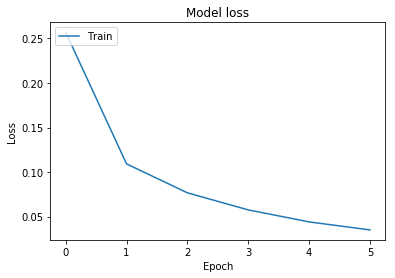

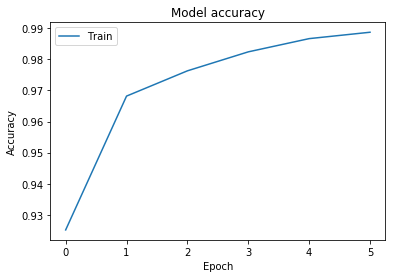

In [9]:
# if you want to visualize the model, you can plot the loss and accuracy over the epochs
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss']) write this line if you add validation_split
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc']) write this line if you add validation_split
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
#Now let's add one more layer and observe the output. 
#As you go on increasing the number of hidden layers, the model will tend to overfit. 


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history= model.fit(train_images, train_labels, epochs=6)
# write model.fit(train_images, train_labels, epochs=10, validation_split=0.25) if you want to validate your model

Epoch 1/6
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2302 - acc: 0.9311
Epoch 2/6
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0979 - acc: 0.9691
Epoch 3/6
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0684 - acc: 0.9785
Epoch 4/6
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0510 - acc: 0.9835
Epoch 5/6
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0417 - acc: 0.9864
Epoch 6/6
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0344 - acc: 0.9883


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.0955 - acc: 0.9744
Test accuracy: 0.9744


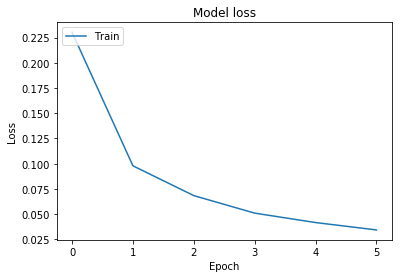

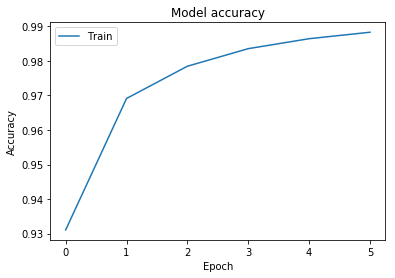

In [12]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
# as the acccuracy on MNIST model is generally very high, it's a bit tough to visualise the overfitting. 
# Let's try with 6 hidden layers over 30 epochs.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=30, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/30
45000/45000 [==============================] - 15s 329us/sample - loss: 0.3024 - acc: 0.9068 - val_loss: 0.1572 - val_acc: 0.9544
Epoch 2/30
45000/45000 [==============================] - 9s 208us/sample - loss: 0.1294 - acc: 0.9620 - val_loss: 0.1255 - val_acc: 0.9633
Epoch 3/30
45000/45000 [==============================] - 9s 210us/sample - loss: 0.0962 - acc: 0.9722 - val_loss: 0.1486 - val_acc: 0.9603
Epoch 4/30
45000/45000 [==============================] - 10s 214us/sample - loss: 0.0800 - acc: 0.9763 - val_loss: 0.1321 - val_acc: 0.9641
Epoch 5/30
45000/45000 [==============================] - 10s 213us/sample - loss: 0.0646 - acc: 0.9814 - val_loss: 0.1383 - val_acc: 0.9659
Epoch 6/30
45000/45000 [==============================] - 10s 217us/sample - loss: 0.0562 - acc: 0.9834 - val_loss: 0.1235 - val_acc: 0.9699
Epoch 7/30
45000/45000 [==============================] - 11s 241us/sample - loss: 0.0517 - acc: 0.9841 - 

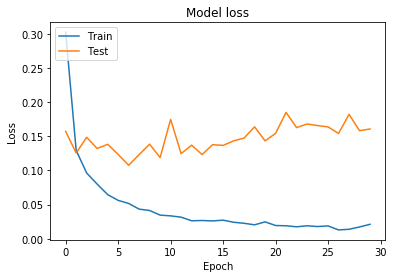

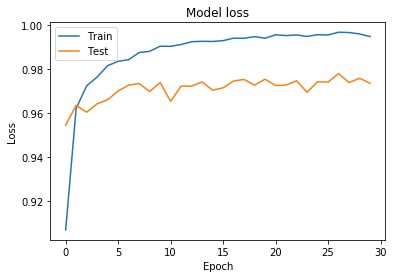

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) #add this line if you add validation_split
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc']) #add this line if you add validation split
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Observe the validation loss curve, which at first decreases, and then started increasing slightly
# which is a sign of overfitting